<a href="https://colab.research.google.com/github/awangg24/Jadwal-Sholat/blob/master/Analisis-sentimen-ulasan-stumbleguys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install google-play-scraper

In [ ]:
# Mengimport Library yang dibutuhkan
from google_play_scraper import app
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#scrape jumlah ulasan yang diinginkan
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.kitkagames.fallbuddies',
    lang='id',  #bahasa
    country='id', #negara
    sort=Sort.MOST_RELEVANT, #sort untuk mendapatkan ulasan yang relevan
    count=1500, #jumlah dataset yang mau diambil
    filter_score_with=None #kemudian di filter_score kita gunakan None untuk mengambil semua score atau ratting bintang 1 sampai 5
)

In [ ]:
df_stumble = pd.DataFrame(np.array(result),columns=['review'])

df_stumble = df_stumble.join(pd.DataFrame(df_stumble.pop('review').tolist()))

df_stumble.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,15e2097c-bbcf-4fc2-b493-84e59235f0c7,Mayasari Hariadi,https://play-lh.googleusercontent.com/a/ACg8oc...,Bagus aja tapi kadang pas lagi main tiba tiba ...,4,500,0.74,2024-06-29 05:11:31,None,NaT,0.74
1,420f1b90-bc42-482d-8ddd-8ee17dc72e17,Muhammad Fadil Rizkulloh,https://play-lh.googleusercontent.com/a-/ALV-U...,Hai scopely saya mau memberikan ulasan tentang...,2,9,0.74.1,2024-07-02 09:40:54,"Halo,\n\nBisakah Anda mengirimkan informasi le...",2024-07-02 12:03:36,0.74.1
2,82cd6542-ed80-40d0-8328-c26985f46c95,hael alta,https://play-lh.googleusercontent.com/a-/ALV-U...,Gameplay nya bagus banget bisa sambil nyantai ...,3,214,0.74,2024-06-26 13:32:17,Hi hael alta! Having your game experience inte...,2024-06-27 10:05:56,0.74
3,ff430dea-2817-4c9a-9ff0-61755d246dad,Aira,https://play-lh.googleusercontent.com/a/ACg8oc...,"Game nya bagus,tapi banyak bug yang bikin manc...",3,116,0.74.1,2024-06-29 14:47:35,Halo Aira! Kami menyesal mendengar Anda mengal...,2024-06-30 18:03:51,0.74.1
4,d21ba1e2-6efd-486d-b3e4-777b3c8ef7bb,Muhammad afatar Plg123,https://play-lh.googleusercontent.com/a/ACg8oc...,"Gamenya bagus,seru,dan banyak pilihan map dan ...",5,6278,0.72,2024-06-06 09:55:46,None,NaT,0.72


In [ ]:
len(df_stumble.index) # hitung kembali berapa jumlah data yg didapatkan

1500

In [ ]:
df_stumble[['reviewId','userName', 'score','at', 'content']].head()  #dari kolom tsb kita filter
                                                        #sehingga didapatkan kolom review,id username, score, at dan content

,reviewId,userName,score,at,content
0,15e2097c-bbcf-4fc2-b493-84e59235f0c7,Mayasari Hariadi,4,2024-06-29 05:11:31,Bagus aja tapi kadang pas lagi main tiba tiba ...
1,420f1b90-bc42-482d-8ddd-8ee17dc72e17,Muhammad Fadil Rizkulloh,2,2024-07-02 09:40:54,Hai scopely saya mau memberikan ulasan tentang...
2,82cd6542-ed80-40d0-8328-c26985f46c95,hael alta,3,2024-06-26 13:32:17,Gameplay nya bagus banget bisa sambil nyantai ...
3,ff430dea-2817-4c9a-9ff0-61755d246dad,Aira,3,2024-06-29 14:47:35,"Game nya bagus,tapi banyak bug yang bikin manc..."
4,d21ba1e2-6efd-486d-b3e4-777b3c8ef7bb,Muhammad afatar Plg123,5,2024-06-06 09:55:46,"Gamenya bagus,seru,dan banyak pilihan map dan ..."


In [ ]:
new_df = df_stumble[['reviewId', 'userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Urutkan berdasarkan terbaru, True jika ingin mengurutkan berdasarkan Terlama.
sorted_df.head()

,reviewId,userName,score,at,content
1279,0e1e2c2c-6344-4721-a2a2-2f68e0e1afab,Aldric Mubarat,5,2024-07-03 07:13:41,Game nya seru bug nya bikin menang coy
753,683d2246-49fd-4992-aefc-e332cb590f87,Arjuna Arjuna,3,2024-07-02 13:53:19,Game aneh gua dah pake data seluler loadingnya...
590,ceef58e8-1c2e-490e-bcde-0061341e694d,Surya Adi nugroho,1,2024-07-02 12:56:17,Saya gak bisa masuk ke gamenya padahal saya si...
37,ce2b1875-ec41-4a52-86ea-52c2cc934cf9,KAREEM 1,2,2024-07-02 12:40:32,"Game nya oke tapi bug nya tolong di fix, perta..."
1242,a1124253-ca59-4422-9b25-7116a005751a,Adi Wahyudi,2,2024-07-02 12:17:56,Game Nya Sangat Bagus Bisa Menghilang Kan Bosa...


In [ ]:
my_df = sorted_df[['reviewId', 'userName', 'score','at', 'content']] # simpan ke variabel

In [ ]:
my_df = my_df[['content', 'score']] #filter kolom hingga sisa kolom content dan score.
my_df

,content,score
1279,Game nya seru bug nya bikin menang coy,5
753,Game aneh gua dah pake data seluler loadingnya...,3
590,Saya gak bisa masuk ke gamenya padahal saya si...,1
37,"Game nya oke tapi bug nya tolong di fix, perta...",2
1242,Game Nya Sangat Bagus Bisa Menghilang Kan Bosa...,2
...,...,...
1044,"Halo, Dengan ini Mohon maaf, Atas Stumble Keba...",5
1356,ada update an baru malah semakin jelek. pas wa...,2
944,"Jujur game nya seru banget, tapi lama- kelamaa...",1
546,Bug yang di dalam game tolong di fix contohnya...,3


**LEBELING**

In [ ]:
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score == 4 :
    return 'Positif'
  elif score == 5 :
    return 'Positif'
my_df['Label'] = my_df ['score'].apply(pelabelan)
my_df.head(1500)

,content,score,Label
1279,Game nya seru bug nya bikin menang coy,5,Positif
753,Game aneh gua dah pake data seluler loadingnya...,3,None
590,Saya gak bisa masuk ke gamenya padahal saya si...,1,Negatif
37,"Game nya oke tapi bug nya tolong di fix, perta...",2,Negatif
1242,Game Nya Sangat Bagus Bisa Menghilang Kan Bosa...,2,Negatif
...,...,...,...
1044,"Halo, Dengan ini Mohon maaf, Atas Stumble Keba...",5,Positif
1356,ada update an baru malah semakin jelek. pas wa...,2,Negatif
944,"Jujur game nya seru banget, tapi lama- kelamaa...",1,Negatif
546,Bug yang di dalam game tolong di fix contohnya...,3,None


In [ ]:
my_df.to_csv("stumbleguys_data_pelabelan.csv", index = False)  # save menjadi file csv

**CLEANING**

In [ ]:
import re
import string

def remove_angka(comment):
    return re.sub(r"\d+", " ", comment)

my_df['content'] = my_df['content'].apply(remove_angka)


def remove_punctuation(comment):
    return comment.translate(str.maketrans("", "", string.punctuation))

my_df['content'] = my_df['content'].apply(remove_punctuation)


def remove_whitespace_LT(comment):
    return comment.strip()

my_df['content'] = my_df['content'].apply(remove_whitespace_LT)


def remove_whitespace_multiple(comment):
    return re.sub('\s+', ' ', comment)

my_df['content'] = my_df['content'].apply(remove_whitespace_multiple)


def remove_single_char(comment):
    return re.sub(r"\b[a-zA-Z]\b", " ", comment)

my_df['content'] = my_df['content'].apply(remove_single_char)

# Menghapus data yang kosong
my_df = my_df.dropna()

print('Hasil Cleaning: \n')
print(my_df.head(1500))


Hasil Cleaning: 

                                                content  score    Label
1279             Game nya seru bug nya bikin menang coy      5  Positif
590   Saya gak bisa masuk ke gamenya padahal saya si...      1  Negatif
37    Game nya oke tapi bug nya tolong di fix pertam...      2  Negatif
1242  Game Nya Sangat Bagus Bisa Menghilang Kan Bosa...      2  Negatif
936   Buat kalian yang crown nya masih dikit tenang ...      5  Positif
...                                                 ...    ...      ...
547   Gamenya Cukup Bagus seru dan juga Bikin Ngakak...      1  Negatif
1478  Aku mau komen lagi karna stumbel gyus uda ku k...      5  Positif
1044  Halo Dengan ini Mohon maaf Atas Stumble Kebany...      5  Positif
1356  ada update an baru malah semakin jelek pas wak...      2  Negatif
944   Jujur game nya seru banget tapi lama kelamaan ...      1  Negatif

[1296 rows x 3 columns]


In [ ]:
my_df.to_csv("stumbleguysjadicleaning_preprocessing.csv", index = False)  #simpan hasil file data cleaning

**PREPROCESSING**

In [ ]:
import pandas as pd
df = pd.read_csv('/content/stumbleguysjadicleaning_preprocessing.csv')
df.head(1500)

,content,score,Label
0,Game nya seru bug nya bikin menang coy,5,Positif
1,Saya gak bisa masuk ke gamenya padahal saya si...,1,Negatif
2,Game nya oke tapi bug nya tolong di fix pertam...,2,Negatif
3,Game Nya Sangat Bagus Bisa Menghilang Kan Bosa...,2,Negatif
4,Buat kalian yang crown nya masih dikit tenang ...,5,Positif
...,...,...,...
1291,Gamenya Cukup Bagus seru dan juga Bikin Ngakak...,1,Negatif
1292,Aku mau komen lagi karna stumbel gyus uda ku k...,5,Positif
1293,Halo Dengan ini Mohon maaf Atas Stumble Kebany...,5,Positif
1294,ada update an baru malah semakin jelek pas wak...,2,Negatif


**CASE FOLDING**

In [ ]:
import re
def  clean_text(df, text_field, new_text_field_name):
    my_df[new_text_field_name] = my_df[text_field].str.lower()
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    # remove numbers
    my_df[new_text_field_name] = my_df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
    return my_df

In [ ]:
my_df['text_clean'] = my_df['content'].str.lower()
my_df['text_clean']
data_clean = clean_text(my_df, 'content', 'text_clean')
data_clean.head(1500)

<ipython-input-16-3a9a2e66e58c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['text_clean'] = my_df['content'].str.lower()
<ipython-input-15-e5017d034b3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df[new_text_field_name] = my_df[text_field].str.lower()
<ipython-input-15-e5017d034b3d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyd

,content,score,Label,text_clean
1279,Game nya seru bug nya bikin menang coy,5,Positif,game nya seru bug nya bikin menang coy
590,Saya gak bisa masuk ke gamenya padahal saya si...,1,Negatif,saya gak bisa masuk ke gamenya padahal saya si...
37,Game nya oke tapi bug nya tolong di fix pertam...,2,Negatif,game nya oke tapi bug nya tolong di fix pertam...
1242,Game Nya Sangat Bagus Bisa Menghilang Kan Bosa...,2,Negatif,game nya sangat bagus bisa menghilang kan bosa...
936,Buat kalian yang crown nya masih dikit tenang ...,5,Positif,buat kalian yang crown nya masih dikit tenang ...
...,...,...,...,...
547,Gamenya Cukup Bagus seru dan juga Bikin Ngakak...,1,Negatif,gamenya cukup bagus seru dan juga bikin ngakak...
1478,Aku mau komen lagi karna stumbel gyus uda ku k...,5,Positif,aku mau komen lagi karna stumbel gyus uda ku k...
1044,Halo Dengan ini Mohon maaf Atas Stumble Kebany...,5,Positif,halo dengan ini mohon maaf atas stumble kebany...
1356,ada update an baru malah semakin jelek pas wak...,2,Negatif,ada update an baru malah semakin jelek pas wak...


**NORMALISASI**

In [ ]:
norm = {" dgn " : " dengan ", " gue ": " saya ", " dgn ":" dengan ", "bgmn ":" bagaimana ", ' tdk':' tidak ', ' blum ':' belum ', 'mantaaaaaaaappp':' bagus ', ' josss ':' bagus ', ' thanks ': ' terima kasih ', 'fast':' cepat ', ' dg ':' dengan ', 'trims':' terima kasih ', 'brg':' barang ', 'gx':' tidak ', ' dgn ':' dengan ', ' recommended':' rekomen ', 'recomend':' rekomen ', 'good':' bagus '}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

my_df['content'] = my_df['content'].apply(lambda x: normalisasi(x))
my_df

<ipython-input-17-bc4ce90eab00>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['content'] = my_df['content'].apply(lambda x: normalisasi(x))


,content,score,Label,text_clean
1279,Game nya seru bug nya bikin menang coy,5,Positif,game nya seru bug nya bikin menang coy
590,Saya gak bisa masuk ke gamenya padahal saya si...,1,Negatif,saya gak bisa masuk ke gamenya padahal saya si...
37,Game nya oke tapi bug nya tolong di fix pertam...,2,Negatif,game nya oke tapi bug nya tolong di fix pertam...
1242,Game Nya Sangat Bagus Bisa Menghilang Kan Bosa...,2,Negatif,game nya sangat bagus bisa menghilang kan bosa...
936,Buat kalian yang crown nya masih dikit tenang ...,5,Positif,buat kalian yang crown nya masih dikit tenang ...
...,...,...,...,...
547,Gamenya Cukup Bagus seru dan juga Bikin Ngakak...,1,Negatif,gamenya cukup bagus seru dan juga bikin ngakak...
1478,Aku mau komen lagi karna stumbel gyus uda ku k...,5,Positif,aku mau komen lagi karna stumbel gyus uda ku k...
1044,Halo Dengan ini Mohon maaf Atas Stumble Kebany...,5,Positif,halo dengan ini mohon maaf atas stumble kebany...
1356,ada update an baru malah semakin jelek pas wak...,2,Negatif,ada update an baru malah semakin jelek pas wak...


**STOPWORD**

In [ ]:
import nltk.corpus
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('indonesian')
data_clean['text_StopWord'] = data_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))
data_clean.head(1500)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-18-45940beeb042>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['text_StopWord'] = data_clean['text_clean'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))


,content,score,Label,text_clean,text_StopWord
1279,Game nya seru bug nya bikin menang coy,5,Positif,game nya seru bug nya bikin menang coy,game nya seru bug nya bikin menang coy
590,Saya gak bisa masuk ke gamenya padahal saya si...,1,Negatif,saya gak bisa masuk ke gamenya padahal saya si...,gak masuk gamenya sinyalnya bagus udah pake wi...
37,Game nya oke tapi bug nya tolong di fix pertam...,2,Negatif,game nya oke tapi bug nya tolong di fix pertam...,game nya oke bug nya tolong fix frame rate sta...
1242,Game Nya Sangat Bagus Bisa Menghilang Kan Bosa...,2,Negatif,game nya sangat bagus bisa menghilang kan bosa...,game nya bagus menghilang bosan kasih bintang ...
936,Buat kalian yang crown nya masih dikit tenang ...,5,Positif,buat kalian yang crown nya masih dikit tenang ...,crown nya dikit tenang cheat crown aja coba eh...
...,...,...,...,...,...
547,Gamenya Cukup Bagus seru dan juga Bikin Ngakak...,1,Negatif,gamenya cukup bagus seru dan juga bikin ngakak...,gamenya bagus seru bikin ngakak fps nya kadang...
1478,Aku mau komen lagi karna stumbel gyus uda ku k...,5,Positif,aku mau komen lagi karna stumbel gyus uda ku k...,komen karna stumbel gyus uda ku kasih bintang ...
1044,Halo Dengan ini Mohon maaf Atas Stumble Kebany...,5,Positif,halo dengan ini mohon maaf atas stumble kebany...,halo mohon maaf stumble kebanyakan bug pindah ...
1356,ada update an baru malah semakin jelek pas wak...,2,Negatif,ada update an baru malah semakin jelek pas wak...,update an jelek pas main ronde ga masuk map ny...


**TOKENIZING**

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize, word_tokenize
data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: word_tokenize(x))
data_clean.head(1500)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-19-0dfd13993782>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['text_tokens'] = data_clean['text_StopWord'].apply(lambda x: word_tokenize(x))


,content,score,Label,text_clean,text_StopWord,text_tokens
1279,Game nya seru bug nya bikin menang coy,5,Positif,game nya seru bug nya bikin menang coy,game nya seru bug nya bikin menang coy,"[game, nya, seru, bug, nya, bikin, menang, coy]"
590,Saya gak bisa masuk ke gamenya padahal saya si...,1,Negatif,saya gak bisa masuk ke gamenya padahal saya si...,gak masuk gamenya sinyalnya bagus udah pake wi...,"[gak, masuk, gamenya, sinyalnya, bagus, udah, ..."
37,Game nya oke tapi bug nya tolong di fix pertam...,2,Negatif,game nya oke tapi bug nya tolong di fix pertam...,game nya oke bug nya tolong fix frame rate sta...,"[game, nya, oke, bug, nya, tolong, fix, frame,..."
1242,Game Nya Sangat Bagus Bisa Menghilang Kan Bosa...,2,Negatif,game nya sangat bagus bisa menghilang kan bosa...,game nya bagus menghilang bosan kasih bintang ...,"[game, nya, bagus, menghilang, bosan, kasih, b..."
936,Buat kalian yang crown nya masih dikit tenang ...,5,Positif,buat kalian yang crown nya masih dikit tenang ...,crown nya dikit tenang cheat crown aja coba eh...,"[crown, nya, dikit, tenang, cheat, crown, aja,..."
...,...,...,...,...,...,...
547,Gamenya Cukup Bagus seru dan juga Bikin Ngakak...,1,Negatif,gamenya cukup bagus seru dan juga bikin ngakak...,gamenya bagus seru bikin ngakak fps nya kadang...,"[gamenya, bagus, seru, bikin, ngakak, fps, nya..."
1478,Aku mau komen lagi karna stumbel gyus uda ku k...,5,Positif,aku mau komen lagi karna stumbel gyus uda ku k...,komen karna stumbel gyus uda ku kasih bintang ...,"[komen, karna, stumbel, gyus, uda, ku, kasih, ..."
1044,Halo Dengan ini Mohon maaf Atas Stumble Kebany...,5,Positif,halo dengan ini mohon maaf atas stumble kebany...,halo mohon maaf stumble kebanyakan bug pindah ...,"[halo, mohon, maaf, stumble, kebanyakan, bug, ..."
1356,ada update an baru malah semakin jelek pas wak...,2,Negatif,ada update an baru malah semakin jelek pas wak...,update an jelek pas main ronde ga masuk map ny...,"[update, an, jelek, pas, main, ronde, ga, masu..."


**STEMMING**

In [ ]:
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 600.9 kB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
#import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}
hitung=0

for document in data_clean['text_tokens']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")
for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    hitung+=1
    print(hitung,":",term,":" ,term_dict[term])

print(term_dict)
print("------------------------")

# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]


#script bisa dipisah dari eksekusi setelah pembacaaan term selesai
data_clean['text_steamindo'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))
data_clean.head(20)

3499
------------------------
1 : game : game
2 : nya : nya
3 : seru : seru
4 : bug : bug
5 : bikin : bikin
6 : menang : menang
7 : coy : coy
8 : gak : gak
9 : masuk : masuk
10 : gamenya : gamenya
11 : sinyalnya : sinyal
12 : bagus : bagus
13 : udah : udah
14 : pake : pake
15 : wifi : wifi
16 : semoga : moga
17 : diperbaiki : baik
18 : oke : oke
19 : tolong : tolong
20 : fix : fix
21 : frame : frame
22 : rate : rate
23 : stabil : stabil
24 : suka : suka
25 : ngefreeze : ngefreeze
26 : ketiga : tiga
27 : lag : lag
28 : scopey : scopey
29 : segeraaaa : segeraaaa
30 : menghilang : hilang
31 : bosan : bosan
32 : kasih : kasih
33 : bintang : bintang
34 : pembaruan : baru
35 : hp : hp
36 : memory : memory
37 : habis : habis
38 : crown : crown
39 : dikit : dikit
40 : tenang : tenang
41 : cheat : cheat
42 : aja : aja
43 : coba : coba
44 : ehh : ehh
45 : berhasil : hasil
46 : beneran : beneran
47 : deh : deh
48 : pokoknya : pokok
49 : main : main
50 : permainan : main
51 : tombol : tombol
52 : 

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo
1279,Game nya seru bug nya bikin menang coy,5,Positif,game nya seru bug nya bikin menang coy,game nya seru bug nya bikin menang coy,"[game, nya, seru, bug, nya, bikin, menang, coy]",game nya seru bug nya bikin menang coy
590,Saya gak bisa masuk ke gamenya padahal saya si...,1,Negatif,saya gak bisa masuk ke gamenya padahal saya si...,gak masuk gamenya sinyalnya bagus udah pake wi...,"[gak, masuk, gamenya, sinyalnya, bagus, udah, ...",gak masuk gamenya sinyal bagus udah pake wifi ...
37,Game nya oke tapi bug nya tolong di fix pertam...,2,Negatif,game nya oke tapi bug nya tolong di fix pertam...,game nya oke bug nya tolong fix frame rate sta...,"[game, nya, oke, bug, nya, tolong, fix, frame,...",game nya oke bug nya tolong fix frame rate sta...
1242,Game Nya Sangat Bagus Bisa Menghilang Kan Bosa...,2,Negatif,game nya sangat bagus bisa menghilang kan bosa...,game nya bagus menghilang bosan kasih bintang ...,"[game, nya, bagus, menghilang, bosan, kasih, b...",game nya bagus hilang bosan kasih bintang game...
936,Buat kalian yang crown nya masih dikit tenang ...,5,Positif,buat kalian yang crown nya masih dikit tenang ...,crown nya dikit tenang cheat crown aja coba eh...,"[crown, nya, dikit, tenang, cheat, crown, aja,...",crown nya dikit tenang cheat crown aja coba eh...
177,Permainan nya bagus Tapi sedikit ada bug tolon...,4,Positif,permainan nya bagus tapi sedikit ada bug tolon...,permainan nya bagus bug tolong diperbaiki bug ...,"[permainan, nya, bagus, bug, tolong, diperbaik...",main nya bagus bug tolong baik bug nya moga to...
46,Banyak bug terus pas mau loncat gak bisa lonca...,1,Negatif,banyak bug terus pas mau loncat gak bisa lonca...,bug pas loncat gak loncat terbang map seluncur...,"[bug, pas, loncat, gak, loncat, terbang, map, ...",bug pas loncat gak loncat terbang map seluncur...
36,Game nya di update malah semakin banyak bug ny...,1,Negatif,game nya di update malah semakin banyak bug ny...,game nya update bug nyasering ngefrezekadangka...,"[game, nya, update, bug, nyasering, ngefrezeka...",game nya update bug nyasering ngefrezekadangka...
779,Gemenya ngeleg ngeleg tapi tetep seru dengan r...,4,Positif,gemenya ngeleg ngeleg tapi tetep seru dengan r...,gemenya ngeleg ngeleg tetep seru rintangan ser...,"[gemenya, ngeleg, ngeleg, tetep, seru, rintang...",gemenya ngeleg ngeleg tetep seru rintang seru ...
8,Game nya bagus misal nya kita lagi gabut main ...,5,Positif,game nya bagus misal nya kita lagi gabut main ...,game nya bagus nya gabut main game gk gabut de...,"[game, nya, bagus, nya, gabut, main, game, gk,...",game nya bagus nya gabut main game gk gabut de...


In [ ]:
data_clean.to_csv('hasilstumblejadi_TextPreProcessing_stumble.csv', index= False) # simpan hasil text preprocessing

<ipython-input-22-776b5bb81005>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['text_steamindo'] = data_clean['text_tokens'].apply(lambda x:' '.join(get_stemmed_term(x)))


In [ ]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [ ]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data_review = list(my_df['content'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 224
Netral = 277
Negatif = 795

Total Data Seluruhnya : 1296


In [ ]:
my_df['sentimen'] = status
my_df

<ipython-input-27-1f5e2319a97b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['sentimen'] = status


,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo,sentimen
1279,Game nya seru bug nya bikin menang coy,5,Positif,game nya seru bug nya bikin menang coy,game nya seru bug nya bikin menang coy,"[game, nya, seru, bug, nya, bikin, menang, coy]",game nya seru bug nya bikin menang coy,Negatif
590,Saya gak bisa masuk ke gamenya padahal saya si...,1,Negatif,saya gak bisa masuk ke gamenya padahal saya si...,gak masuk gamenya sinyalnya bagus udah pake wi...,"[gak, masuk, gamenya, sinyalnya, bagus, udah, ...",gak masuk gamenya sinyal bagus udah pake wifi ...,Netral
37,Game nya oke tapi bug nya tolong di fix pertam...,2,Negatif,game nya oke tapi bug nya tolong di fix pertam...,game nya oke bug nya tolong fix frame rate sta...,"[game, nya, oke, bug, nya, tolong, fix, frame,...",game nya oke bug nya tolong fix frame rate sta...,Negatif
1242,Game Nya Sangat Bagus Bisa Menghilang Kan Bosa...,2,Negatif,game nya sangat bagus bisa menghilang kan bosa...,game nya bagus menghilang bosan kasih bintang ...,"[game, nya, bagus, menghilang, bosan, kasih, b...",game nya bagus hilang bosan kasih bintang game...,Negatif
936,Buat kalian yang crown nya masih dikit tenang ...,5,Positif,buat kalian yang crown nya masih dikit tenang ...,crown nya dikit tenang cheat crown aja coba eh...,"[crown, nya, dikit, tenang, cheat, crown, aja,...",crown nya dikit tenang cheat crown aja coba eh...,Negatif
...,...,...,...,...,...,...,...,...
547,Gamenya Cukup Bagus seru dan juga Bikin Ngakak...,1,Negatif,gamenya cukup bagus seru dan juga bikin ngakak...,gamenya bagus seru bikin ngakak fps nya kadang...,"[gamenya, bagus, seru, bikin, ngakak, fps, nya...",gamenya bagus seru bikin ngakak fps nya kadang...,Negatif
1478,Aku mau komen lagi karna stumbel gyus uda ku k...,5,Positif,aku mau komen lagi karna stumbel gyus uda ku k...,komen karna stumbel gyus uda ku kasih bintang ...,"[komen, karna, stumbel, gyus, uda, ku, kasih, ...",komen karna stumbel gyus uda ku kasih bintang ...,Negatif
1044,Halo Dengan ini Mohon maaf Atas Stumble Kebany...,5,Positif,halo dengan ini mohon maaf atas stumble kebany...,halo mohon maaf stumble kebanyakan bug pindah ...,"[halo, mohon, maaf, stumble, kebanyakan, bug, ...",halo mohon maaf stumble banyak bug pindah akun...,Negatif
1356,ada update an baru malah semakin jelek pas wak...,2,Negatif,ada update an baru malah semakin jelek pas wak...,update an jelek pas main ronde ga masuk map ny...,"[update, an, jelek, pas, main, ronde, ga, masu...",update an jelek pas main ronde ga masuk map ny...,Positif


**VISUALISASI**

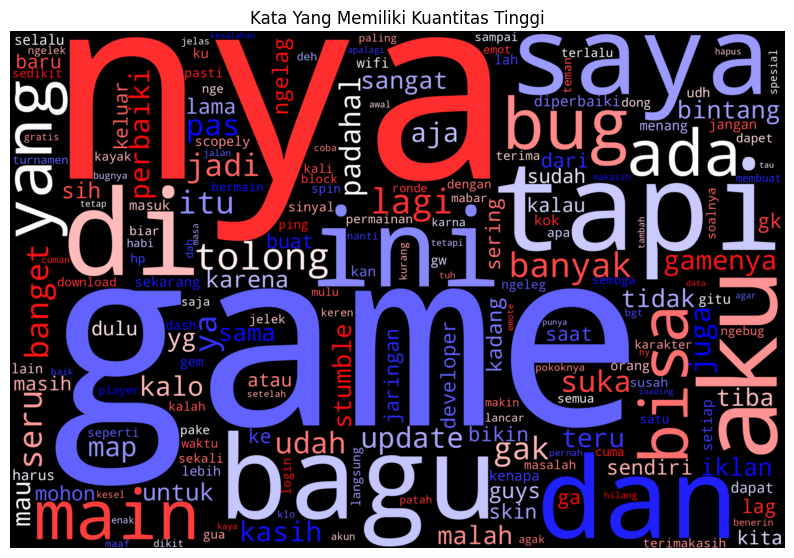

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in my_df['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)

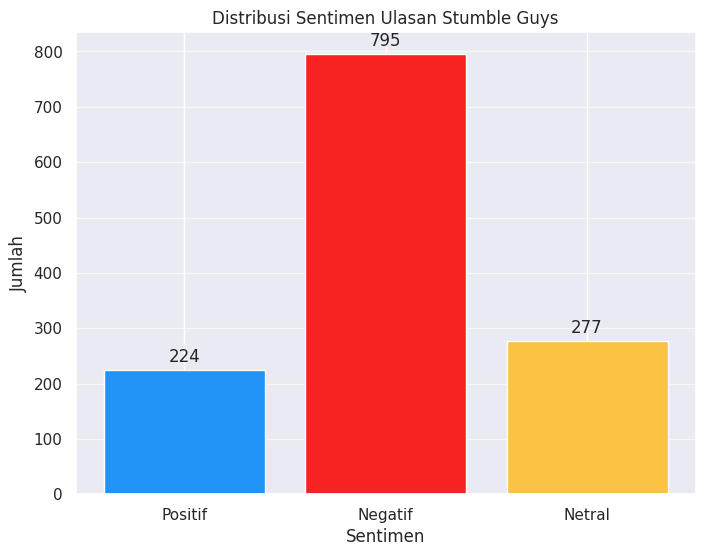

In [ ]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Stumble Guys")


In [ ]:
# Menghapus Sentimen Netral
my_df = my_df[my_df['sentimen'] != 'Netral']
my_df

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo,sentimen
1279,Game nya seru bug nya bikin menang coy,5,Positif,game nya seru bug nya bikin menang coy,game nya seru bug nya bikin menang coy,"[game, nya, seru, bug, nya, bikin, menang, coy]",game nya seru bug nya bikin menang coy,Negatif
37,Game nya oke tapi bug nya tolong di fix pertam...,2,Negatif,game nya oke tapi bug nya tolong di fix pertam...,game nya oke bug nya tolong fix frame rate sta...,"[game, nya, oke, bug, nya, tolong, fix, frame,...",game nya oke bug nya tolong fix frame rate sta...,Negatif
1242,Game Nya Sangat Bagus Bisa Menghilang Kan Bosa...,2,Negatif,game nya sangat bagus bisa menghilang kan bosa...,game nya bagus menghilang bosan kasih bintang ...,"[game, nya, bagus, menghilang, bosan, kasih, b...",game nya bagus hilang bosan kasih bintang game...,Negatif
936,Buat kalian yang crown nya masih dikit tenang ...,5,Positif,buat kalian yang crown nya masih dikit tenang ...,crown nya dikit tenang cheat crown aja coba eh...,"[crown, nya, dikit, tenang, cheat, crown, aja,...",crown nya dikit tenang cheat crown aja coba eh...,Negatif
36,Game nya di update malah semakin banyak bug ny...,1,Negatif,game nya di update malah semakin banyak bug ny...,game nya update bug nyasering ngefrezekadangka...,"[game, nya, update, bug, nyasering, ngefrezeka...",game nya update bug nyasering ngefrezekadangka...,Negatif
...,...,...,...,...,...,...,...,...
547,Gamenya Cukup Bagus seru dan juga Bikin Ngakak...,1,Negatif,gamenya cukup bagus seru dan juga bikin ngakak...,gamenya bagus seru bikin ngakak fps nya kadang...,"[gamenya, bagus, seru, bikin, ngakak, fps, nya...",gamenya bagus seru bikin ngakak fps nya kadang...,Negatif
1478,Aku mau komen lagi karna stumbel gyus uda ku k...,5,Positif,aku mau komen lagi karna stumbel gyus uda ku k...,komen karna stumbel gyus uda ku kasih bintang ...,"[komen, karna, stumbel, gyus, uda, ku, kasih, ...",komen karna stumbel gyus uda ku kasih bintang ...,Negatif
1044,Halo Dengan ini Mohon maaf Atas Stumble Kebany...,5,Positif,halo dengan ini mohon maaf atas stumble kebany...,halo mohon maaf stumble kebanyakan bug pindah ...,"[halo, mohon, maaf, stumble, kebanyakan, bug, ...",halo mohon maaf stumble banyak bug pindah akun...,Negatif
1356,ada update an baru malah semakin jelek pas wak...,2,Negatif,ada update an baru malah semakin jelek pas wak...,update an jelek pas main ronde ga masuk map ny...,"[update, an, jelek, pas, main, ronde, ga, masu...",update an jelek pas main ronde ga masuk map ny...,Positif


In [ ]:
my_df = my_df.replace({'Positif':1, 'Negatif':0})
my_df

,content,score,Label,text_clean,text_StopWord,text_tokens,text_steamindo,sentimen
1279,Game nya seru bug nya bikin menang coy,5,1,game nya seru bug nya bikin menang coy,game nya seru bug nya bikin menang coy,"[game, nya, seru, bug, nya, bikin, menang, coy]",game nya seru bug nya bikin menang coy,0
37,Game nya oke tapi bug nya tolong di fix pertam...,2,0,game nya oke tapi bug nya tolong di fix pertam...,game nya oke bug nya tolong fix frame rate sta...,"[game, nya, oke, bug, nya, tolong, fix, frame,...",game nya oke bug nya tolong fix frame rate sta...,0
1242,Game Nya Sangat Bagus Bisa Menghilang Kan Bosa...,2,0,game nya sangat bagus bisa menghilang kan bosa...,game nya bagus menghilang bosan kasih bintang ...,"[game, nya, bagus, menghilang, bosan, kasih, b...",game nya bagus hilang bosan kasih bintang game...,0
936,Buat kalian yang crown nya masih dikit tenang ...,5,1,buat kalian yang crown nya masih dikit tenang ...,crown nya dikit tenang cheat crown aja coba eh...,"[crown, nya, dikit, tenang, cheat, crown, aja,...",crown nya dikit tenang cheat crown aja coba eh...,0
36,Game nya di update malah semakin banyak bug ny...,1,0,game nya di update malah semakin banyak bug ny...,game nya update bug nyasering ngefrezekadangka...,"[game, nya, update, bug, nyasering, ngefrezeka...",game nya update bug nyasering ngefrezekadangka...,0
...,...,...,...,...,...,...,...,...
547,Gamenya Cukup Bagus seru dan juga Bikin Ngakak...,1,0,gamenya cukup bagus seru dan juga bikin ngakak...,gamenya bagus seru bikin ngakak fps nya kadang...,"[gamenya, bagus, seru, bikin, ngakak, fps, nya...",gamenya bagus seru bikin ngakak fps nya kadang...,0
1478,Aku mau komen lagi karna stumbel gyus uda ku k...,5,1,aku mau komen lagi karna stumbel gyus uda ku k...,komen karna stumbel gyus uda ku kasih bintang ...,"[komen, karna, stumbel, gyus, uda, ku, kasih, ...",komen karna stumbel gyus uda ku kasih bintang ...,0
1044,Halo Dengan ini Mohon maaf Atas Stumble Kebany...,5,1,halo dengan ini mohon maaf atas stumble kebany...,halo mohon maaf stumble kebanyakan bug pindah ...,"[halo, mohon, maaf, stumble, kebanyakan, bug, ...",halo mohon maaf stumble banyak bug pindah akun...,0
1356,ada update an baru malah semakin jelek pas wak...,2,0,ada update an baru malah semakin jelek pas wak...,update an jelek pas main ronde ga masuk map ny...,"[update, an, jelek, pas, main, ronde, ga, masu...",update an jelek pas main ronde ga masuk map ny...,1


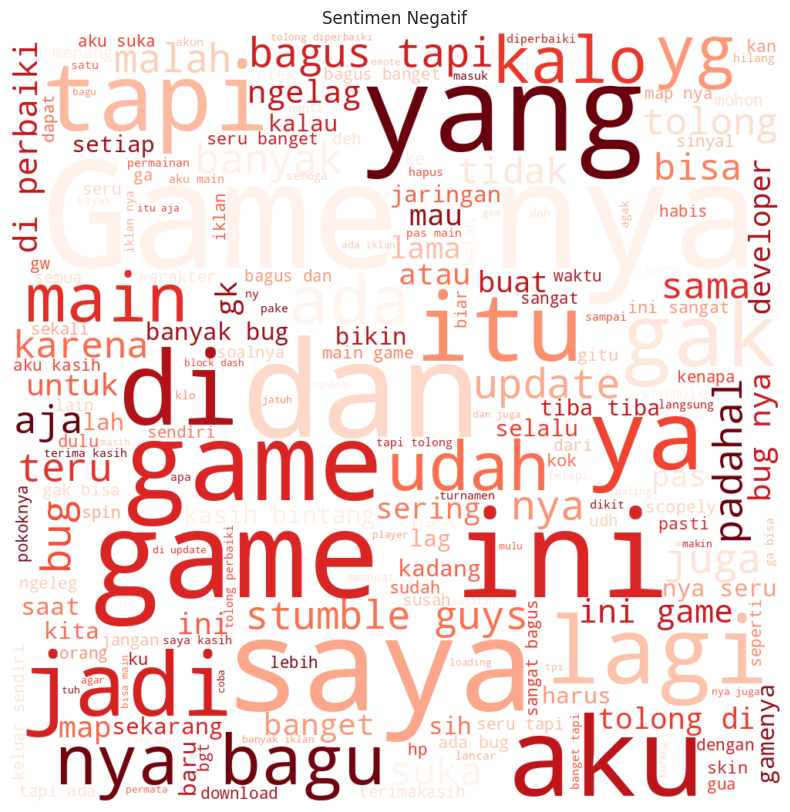

In [ ]:
# Visualisasi Wordcould Positif & Negatif

my_df_negatif = my_df[my_df['sentimen'] == 0]


all_words = ' '.join([reviews for reviews in my_df_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

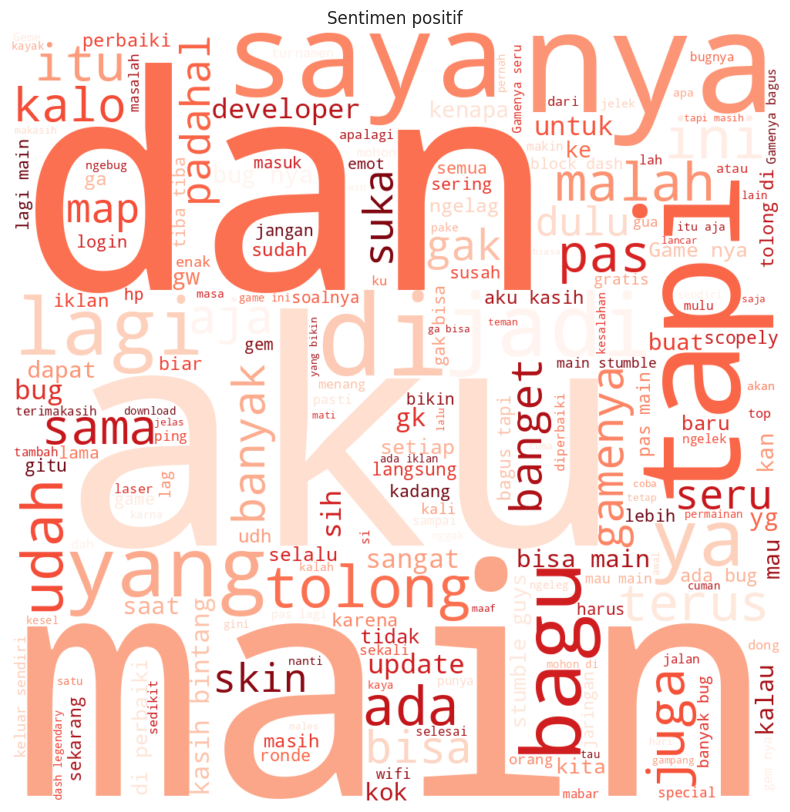

In [ ]:
# Visualisasi Wordcould Positif & Negatif

my_df_positif = my_df[my_df['sentimen'] == 1]


all_words = ' '.join([reviews for reviews in my_df_positif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen positif")
plt.margins(x=0, y=0)
plt.show()


In [ ]:
# Menghitung Jumlah Sentimen Negatif dan Positif
my_df['sentimen'].value_counts()

sentimen
0    795
1    224
Name: count, dtype: int64

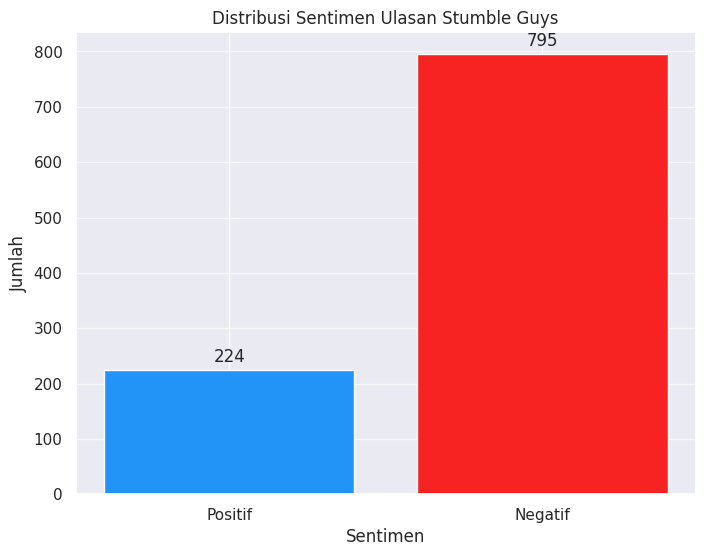

In [ ]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Stumble Guys")

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

 **SPLIT DATA **

In [ ]:
#membagi data menjadi data training dan testing dengan test_size = 0.20 dan random state nya 0
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_clean['content'], data_clean['Label'],
                                                    test_size = 0.20,
                                                    random_state = 0)

**TF-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test = tfidf_vectorizer.transform(X_test)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1036,)
(1036,)
(260,)
(260,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
vectorizer.fit(X_train)

CountVectorizer()

In [ ]:
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [ ]:
print(X_train)

1265    Scopely gan bisa bikin game aneh banyak bug ga...
1186    Game nya bagus tapi tolong di perbaiki agak ng...
1127    Game nya bagus tapi udah update beta tapi ngga...
611     Yang bikin bagus semua nya bagus tapi bug nya ...
163     Game nya bagus² aja si di awal² tapi lama² keb...
                              ...                        
456     Teman saya tidak mau main game ini karena suda...
118     game nya bagus tapi iklan nya gak banyak ada b...
1178    Mengapa sih saat main harus ngunduh aset mana ...
892     Awalnya saya main itu nge lag tapi lama lama j...
901     Game nya bagus tapi banyak yang pake emot spes...
Name: content, Length: 815, dtype: object


**MODELLING NB**

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(tfidf_train, y_train)

MultinomialNB()

In [ ]:
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 0)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

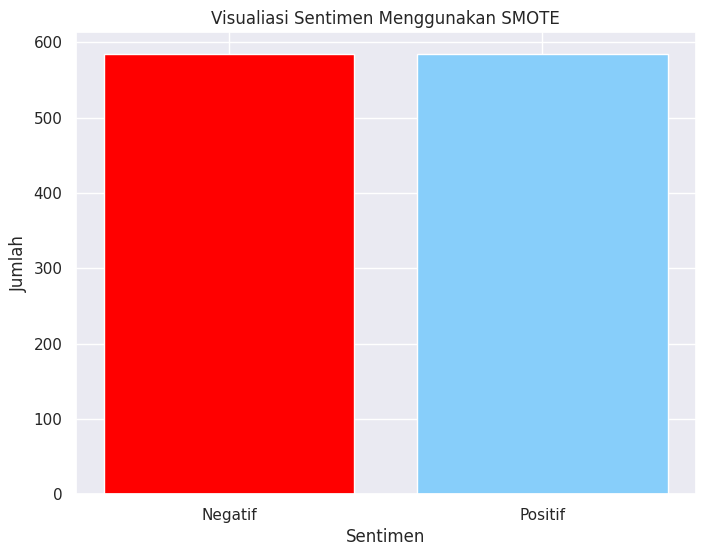

In [ ]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

In [ ]:
y_pred = nb.predict(tfidf_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

clf = MultinomialNB()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)



print("MultinomialNB Accuracy:", accuracy_score(y_test,predicted))
print("MultinomialNB Precision:", precision_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB Recall:", recall_score(y_test,predicted, average="binary", pos_label="Negatif"))
print("MultinomialNB f1_score:", f1_score(y_test,predicted, average="binary", pos_label="Negatif"))

print(f'confusion_matrix:\n {confusion_matrix(y_test, predicted)}')
print('====================================================\n')
print(classification_report(y_test, predicted, zero_division=0))

# Calculate confusion matrix
cm = confusion_matrix(y_test, predicted)

# Assign confusion matrix values
tn, fp, fn, tp = cm.ravel()

print("True Positive : ", tp)
# Accuracy score
print("True Negative : ", tn)
# Precision score
print("False Positive : ", fp)
# Recall score
print("False Negative  : ", fn)

# Load dataset
data_clean = pd.read_csv('hasilstumblejadi_TextPreProcessing_stumble.csv')


MultinomialNB Accuracy: 0.8153846153846154
MultinomialNB Precision: 0.7903225806451613
MultinomialNB Recall: 0.8166666666666667
MultinomialNB f1_score: 0.8032786885245902
confusion_matrix:
 [[ 98  22]
 [ 26 114]]

              precision    recall  f1-score   support

     Negatif       0.79      0.82      0.80       120
     Positif       0.84      0.81      0.83       140

    accuracy                           0.82       260
   macro avg       0.81      0.82      0.81       260
weighted avg       0.82      0.82      0.82       260

True Positive :  114
True Negative :  98
False Positive :  22
False Negative  :  26


In [ ]:
from sklearn.model_selection import train_test_split

# Definisikan X dan y
X = my_df['content']
y = my_df['Label']

# Bagi data menjadi data training dan data testing
# Dalam contoh di atas, stratify=y menjamin bahwa pembagian dilakukan secara proporsional terhadap kelas target y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=0)

# Outputkan jumlah data training dan data testing
print("Jumlah data training:", len(X_train))
print("Jumlah data testing:", len(X_test))

Jumlah data training: 815
Jumlah data testing: 204


[Text(0.5, 1.0, 'Heatmap TP, TN, FP, FN')]

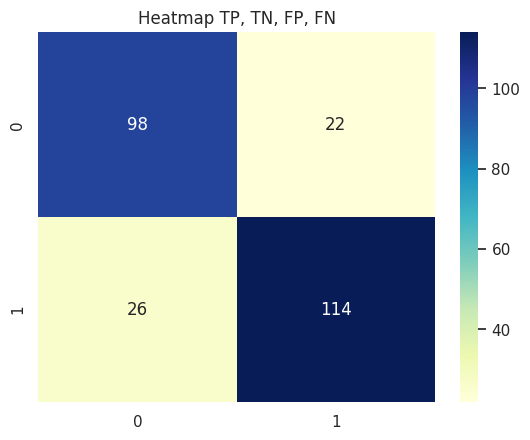

In [ ]:
cm_matrix = pd.DataFrame(data=cm, columns=['0', '1'],
                         index=['0', '1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu').set(title='Heatmap TP, TN, FP, FN')

In [ ]:
from sklearn.metrics import confusion_matrix

# Hitung confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['negative', 'positive'],
            yticklabels=['negative', 'positive'])

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [204, 260]